The dataset used in this notebook could be found on this link: https://archive.ics.uci.edu/ml/datasets/Air+Quality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Atributes info:

    0 Date	(DD/MM/YYYY) 
    1 Time	(HH.MM.SS) 
    2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
    3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	
    4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
    5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
    6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	
    7 True hourly averaged NOx concentration in ppb (reference analyzer) 
    8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
    9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	
    10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	
    11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
    12 Temperature in Â°C	
    13 Relative Humidity (%) 
    14 AH Absolute Humidity 

In [2]:
air_data = pd.read_excel('AirQualityUCI.xlsx')

In [3]:
air_data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [4]:
air_data.shape

(9357, 15)

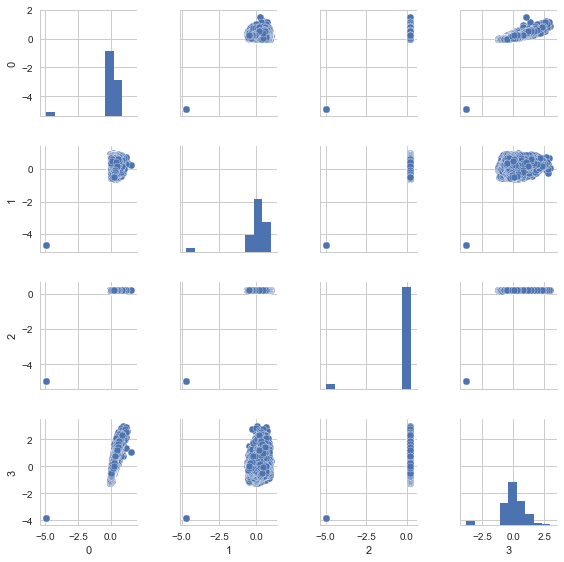

In [47]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sns.set(style='whitegrid', context='notebook')
features_plot = ['C6H6(GT)', 'RH', 'AH', 'PT08.S1(CO)']

data_to_plot = air_data[features_plot]
data_to_plot = scalar.fit_transform(data_to_plot)
data_to_plot = pd.DataFrame(data_to_plot)

sns.pairplot(data_to_plot, size=2.0);
plt.tight_layout()
plt.show()

## Step 1. Preprocessing data

In [5]:
air_data.dropna(axis=0, how='all')

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6  1360.000000       150  11.881723   
1    2004-03-10  19:00:00     2.0  1292.250000       112   9.397165   
2    2004-03-10  20:00:00     2.2  1402.000000        88   8.997817   
3    2004-03-10  21:00:00     2.2  1375.500000        80   9.228796   
4    2004-03-10  22:00:00     1.6  1272.250000        51   6.518224   
5    2004-03-10  23:00:00     1.2  1197.000000        38   4.741012   
6    2004-03-11  00:00:00     1.2  1185.000000        31   3.624399   
7    2004-03-11  01:00:00     1.0  1136.250000        31   3.326677   
8    2004-03-11  02:00:00     0.9  1094.000000        24   2.339416   
9    2004-03-11  03:00:00     0.6  1009.750000        19   1.696658   
10   2004-03-11  04:00:00  -200.0  1011.000000        14   1.293620   
11   2004-03-11  05:00:00     0.7  1066.000000         8   1.133431   
12   2004-03-11  06:00:00     0.7  1051.750000        16   1.603768   
13   2004-03-11  07:00:00     1.1  1144.000000        29   3.243618   
14   2004-03-11  08:00:00     2.0  1333.250000        64   8.013773   
15   2004-03-11  09:00:00     2.2  1351.000000        87   9.540643   
16   2004-03-11  10:00:00     1.7  1233.250000        77   6.335782   
17   2004-03-11  11:00:00     1.5  1178.750000        43   4.971584   
18   2004-03-11  12:00:00     1.6  1236.000000        61   5.216919   
19   2004-03-11  13:00:00     1.9  1285.500000        63   7.269933   
20   2004-03-11  14:00:00     2.9  1371.000000       164  11.539007   
21   2004-03-11  15:00:00     2.2  1310.000000        79   8.826223   
22   2004-03-11  16:00:00     2.2  1291.750000        95   8.301413   
23   2004-03-11  17:00:00     2.9  1383.000000       150  11.151581   
24   2004-03-11  18:00:00     4.8  1580.750000       307  20.799217   
25   2004-03-11  19:00:00     6.9  1775.500000       461  27.359807   
26   2004-03-11  20:00:00     6.1  1640.000000       401  24.017757   
27   2004-03-11  21:00:00     3.9  1312.750000       197  12.779368   
28   2004-03-11  22:00:00     1.5   964.500000        61   4.707072   
29   2004-03-11  23:00:00     1.0   912.750000        26   2.645722   
...         ...       ...     ...          ...       ...        ...   
9327 2005-04-03  09:00:00     1.2  1022.250000      -200   4.082095   
9328 2005-04-03  10:00:00     1.4   970.250000      -200   3.402194   
9329 2005-04-03  11:00:00     1.3   999.750000      -200   5.313402   
9330 2005-04-03  12:00:00     1.4   996.000000      -200   5.349138   
9331 2005-04-03  13:00:00     1.0   928.000000      -200   3.817080   
9332 2005-04-03  14:00:00     1.0   932.750000      -200   4.201281   
9333 2005-04-03  15:00:00     1.1   956.000000      -200   5.395234   
9334 2005-04-03  16:00:00     1.3   967.500000      -200   6.313819   
9335 2005-04-03  17:00:00     1.4   952.500000      -200   6.101377   
9336 2005-04-03  18:00:00     1.2  1014.666667      -200   4.594689   
9337 2005-04-03  19:00:00     2.7  1248.000000      -200  11.109658   
9338 2005-04-03  20:00:00     2.5  1180.250000      -200   7.868564   
9339 2005-04-03  21:00:00     1.5  1101.750000      -200   5.999005   
9340 2005-04-03  22:00:00     1.6  1115.500000      -200   5.817660   
9341 2005-04-03  23:00:00     1.2  1099.750000      -200   5.106145   
9342 2005-04-04  00:00:00     0.9  1012.000000      -200   3.504006   
9343 2005-04-04  01:00:00     0.6   944.250000      -200   1.931932   
9344 2005-04-04  02:00:00     0.5   911.750000      -200   1.489323   
9345 2005-04-04  03:00:00     0.4   887.000000      -200   1.086365   
9346 2005-04-04  04:00:00  -200.0   864.250000      -200   0.801504   
9347 2005-04-04  05:00:00     0.5   888.250000      -200   1.307608   
9348 2005-04-04  06:00:00     1.1  1030.500000      -200   4.359341   
9349 2005-04-04  07:00:00     4.0  1383.500000      -200  17.364240   
9350 2005-04-04  08:00:00     5.0  1446.000000      -200  22.393233   
9351 2005-04-04  09:00:00     3.9  

## Step 2. Features vs Labels

In [64]:
features = air_data

In [65]:
features = features.drop('Date', axis=1)
features = features.drop('Time', axis=1)
features = features.drop('C6H6(GT)', axis=1)
features = features.drop('PT08.S4(NO2)', axis=1)

In [66]:
labels = air_data['C6H6(GT)'].values

In [67]:
features = features.values

## Step 3. Train and test portions

In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

In [12]:
print("X_trian shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_trian shape --> (6549, 11)
y_train shape --> (6549,)
X_test shape --> (2808, 11)
y_test shape --> (2808,)


## Step 4. Regression

### Step 4.1 Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print("Predicted values:", regressor.predict(X_test))

Predicted values: [  5.14503456  27.5482771    3.72745264 ...,  16.90736721  14.82831269
  11.49441036]


In [16]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.999240676116


### Step 4.2  Support Vector Regression

In [17]:
from sklearn.cross_validation import KFold
from sklearn.svm import SVR

In [23]:
support_regressor = SVR(kernel='rbf', C=1000)
support_regressor.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
print("Coefficient of determination R^2 <-- on train set: {}".format(support_regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9999937958462688


In [35]:
print("Coefficient of determination R^2 <-- on test set: {}".format(support_regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.27016076957799007


### Step 4.3 Decision tree regression

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [32]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [33]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9999939303622412


### Step 4.4 Lasso regression

In [36]:
from sklearn.linear_model import Lasso

In [37]:
indiana_jones = Lasso(alpha=1.0)
indiana_jones.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
print("Coefficient of determination R^2 <-- on train set : {}".format(indiana_jones.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set : 0.9991459260679414


In [39]:
print("Coefficient of determination R^2 <-- on test set: {}".format(indiana_jones.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9991512516813533


Indiana Jones is doing pretty good Machine Learning :O 

## Step 5. Feature selection

In [48]:
from sklearn.ensemble import ExtraTreesRegressor

In [49]:
etr = ExtraTreesRegressor(n_estimators=300)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [51]:
print(etr.feature_importances_)
indecis = np.argsort(etr.feature_importances_)[::-1]

[  1.50692263e-04   1.02801235e-01   1.13069875e-05   5.57465913e-02
   5.15179121e-04   5.98430758e-02   1.97107047e-04   5.41334100e-02
   2.35761613e-01   2.13143582e-01   2.77696207e-01]


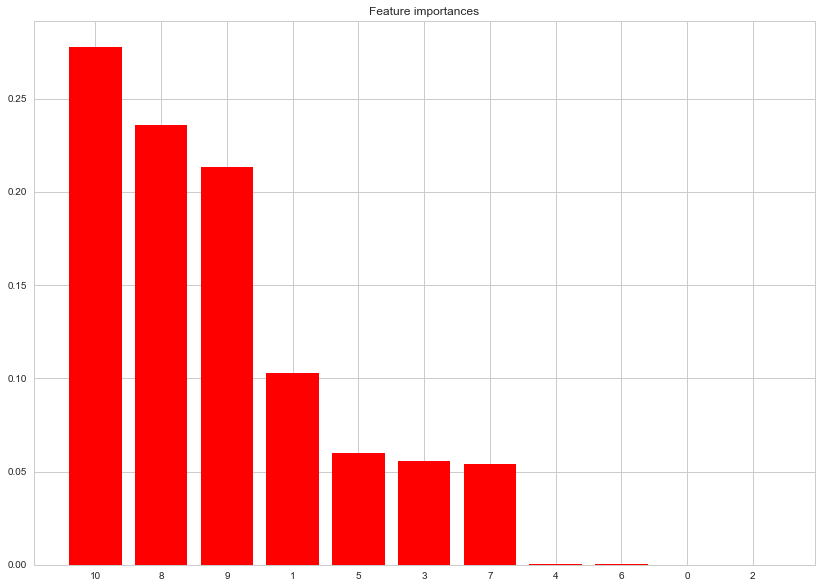

In [60]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), etr.feature_importances_[indecis],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indecis)
plt.show()